In [8]:
df=pd.read_excel("C:\\Users\\DELL\\Desktop\\Amazon Prime video.xlsx")
print(df)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

In [9]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7585 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,NaN,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,NaN,NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,NaN,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-14 13:46:50.322580736,2008.341849,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-30 00:00:00,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 00:00:00,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-20 00:00:00,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-16 00:00:00,2019.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-10 00:00:00,2021.000000,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df['type'].value_counts()
df['rating'].value_counts()
df['listed_in'].value_counts().head(10)

listed_in
Drama                            986
Comedy                           536
Drama, Suspense                  399
Comedy, Drama                    377
Animation, Kids                  356
Documentary                      350
Kids                             334
Action, Drama                    297
Documentary, Special Interest    296
TV Shows                         263
Name: count, dtype: int64

In [12]:
df['release_year'].value_counts().sort_index()
df['duration'].head() 

0    113 min
1    110 min
2     74 min
3     69 min
4     45 min
Name: duration, dtype: object

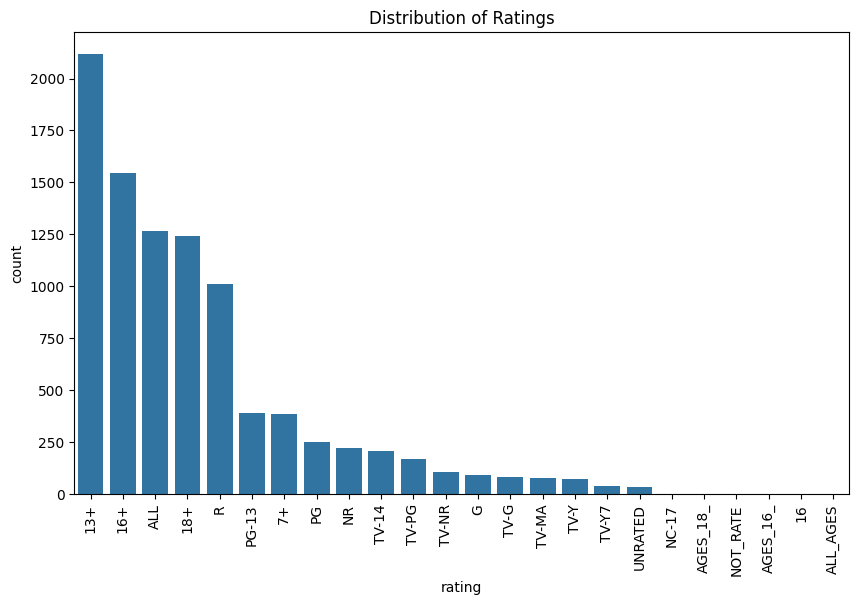

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=90)
plt.show()

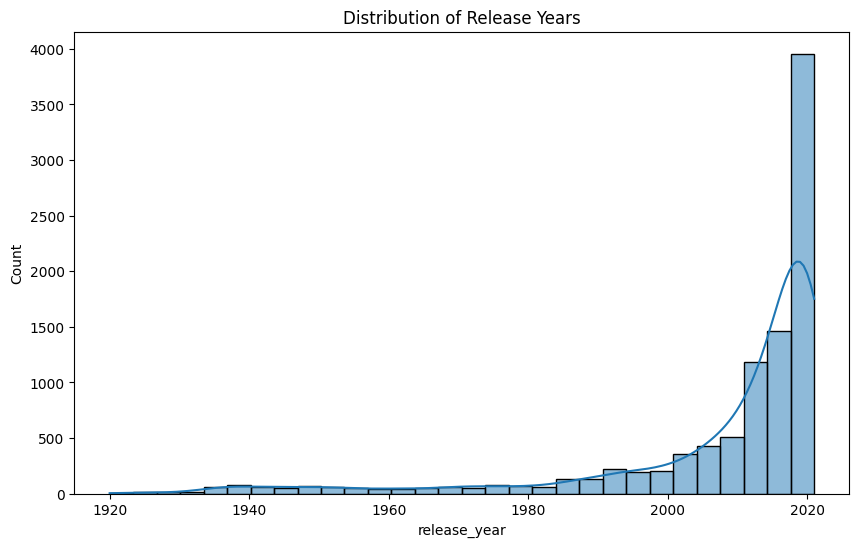

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.show()

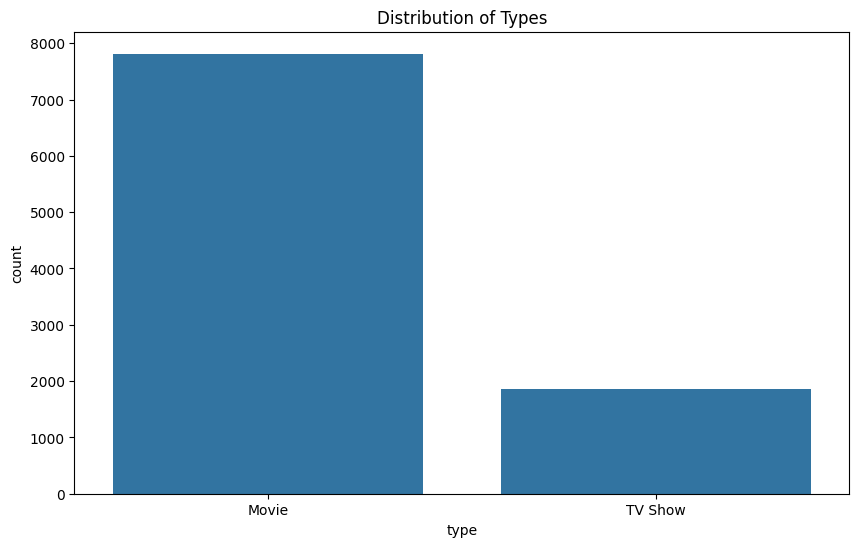

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Types')
plt.show()

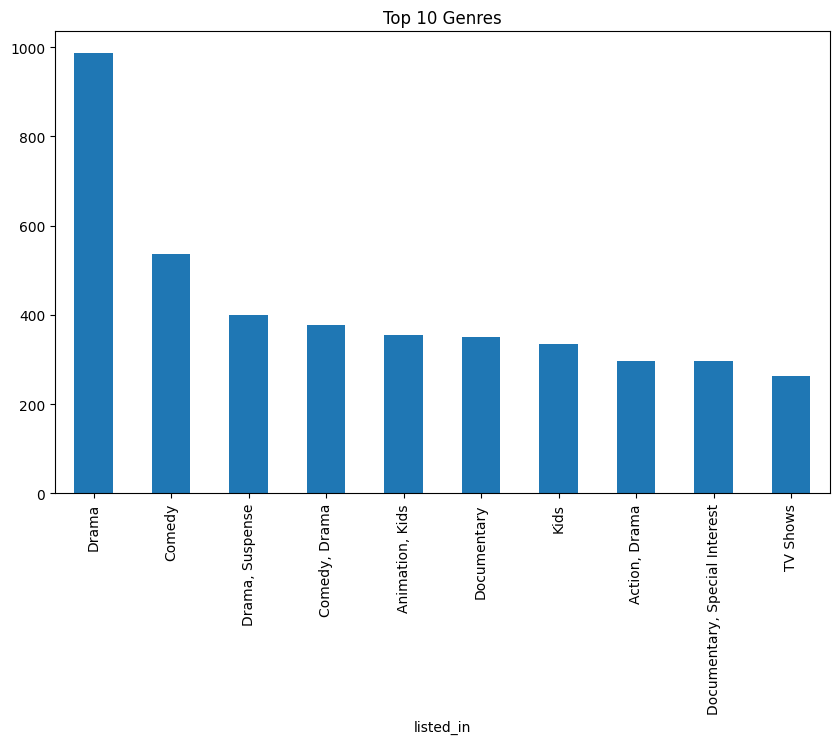

In [16]:
plt.figure(figsize=(10, 6))
df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()

0    113
1    110
2     74
3     69
4     45
Name: duration, dtype: int32


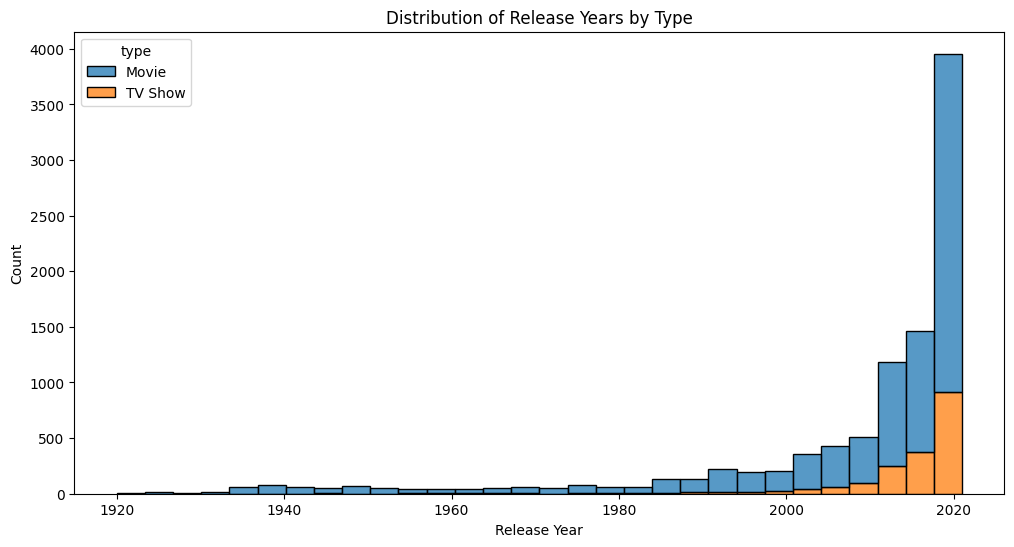

In [21]:
df_duration = df[df['duration'].str.contains(' min')].copy()
df_duration['duration'] = df_duration['duration'].str.replace(' min', '').astype(int)

# Check the conversion
print(df_duration['duration'].head())
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Distribution of Release Years by Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

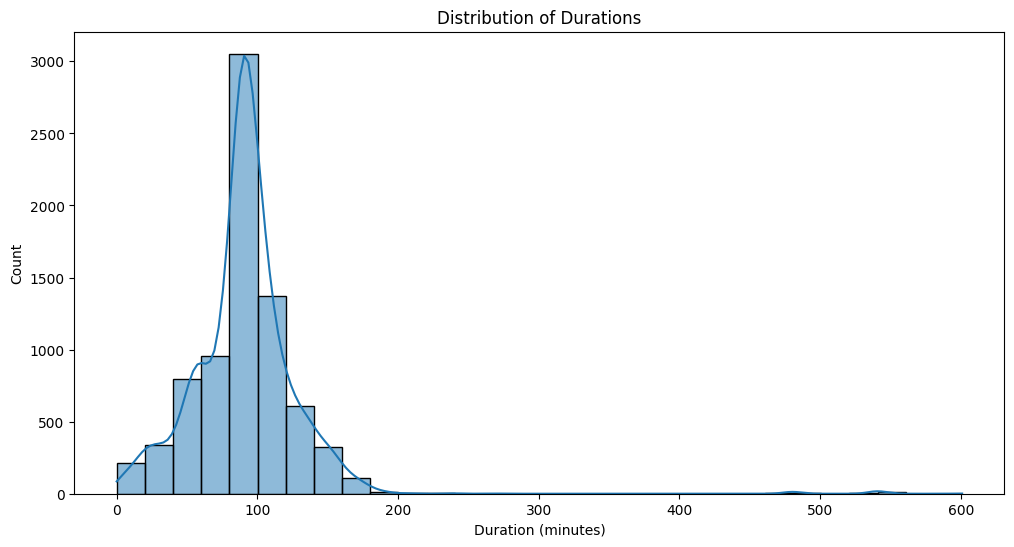

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df_duration['duration'], bins=30, kde=True)
plt.title('Distribution of Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

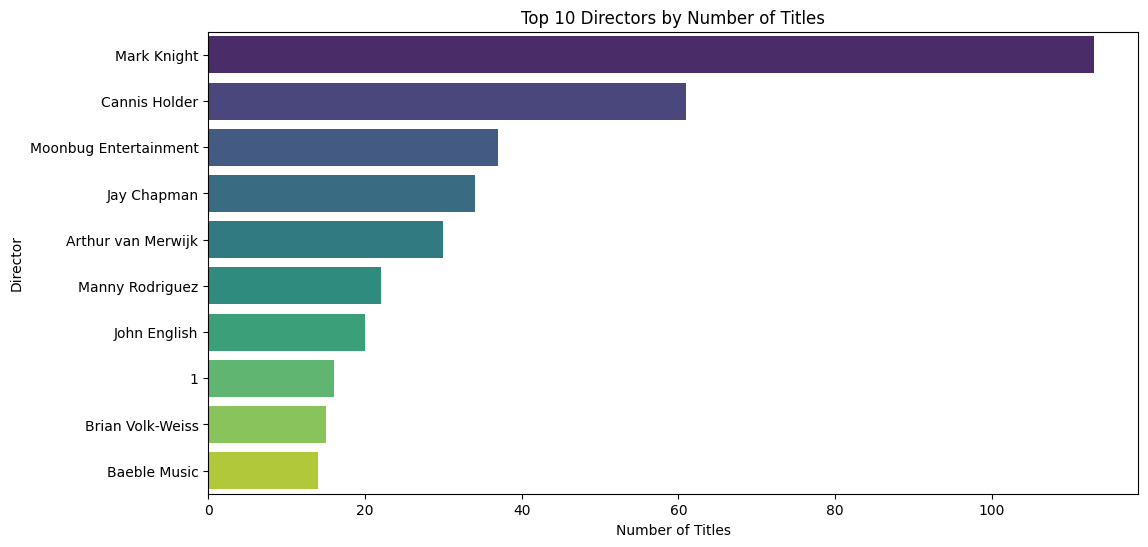

In [23]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


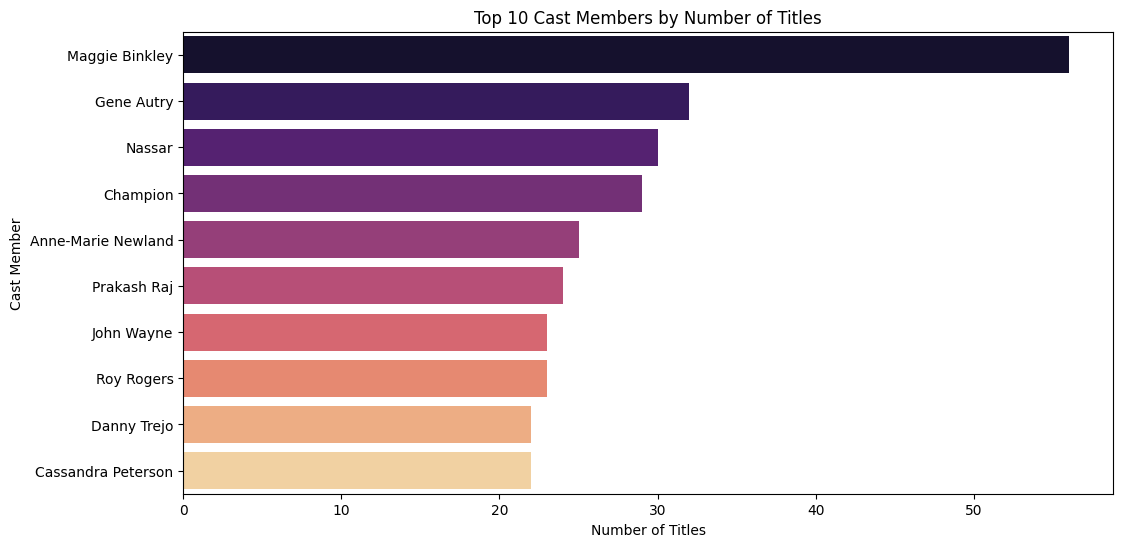

In [24]:
cast_series = df['cast'].dropna().str.split(',').explode().str.strip()
top_cast = cast_series.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.values, y=top_cast.index, hue=top_cast.index, palette='magma', dodge=False, legend=False)
plt.title('Top 10 Cast Members by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.show()

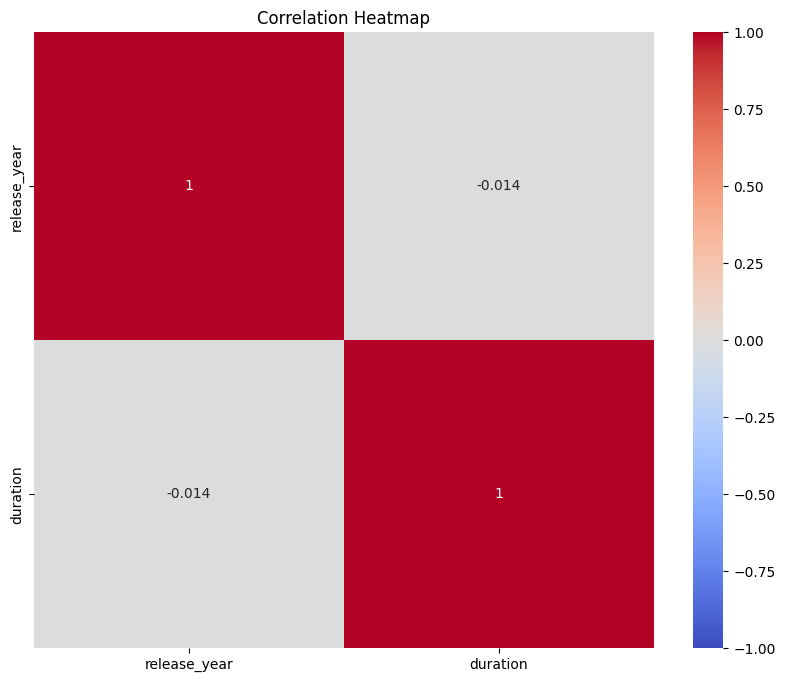

In [25]:
plt.figure(figsize=(10, 8))
corr_matrix = df_duration[['release_year', 'duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()